# Decision trees and random forests

Decision trees build classification or regression models in the form of a tree structure. Creating a binary decision tree is a process of dividing up the input space. A greedy and recursive approach is used to recursively create binary splits in the input space. At each step, all the values are lined up and different split points are tried and tested using a cost function. The split with the best cost (lowest cost because we minimize cost) is selected. All input variables and all possible split points are evaluated and chosen in a greedy manner as the optimal split point is chosen in each step without checking for whether or not the split will lead to the lowest possible cost several levels down. 

In order to make a prediction for a given observation, we typically use the mean (regression) or the mode (classification) of the training observations in the region to which the observation belongs. 

### A. Classification using decision trees

1. Import the make_moons dataset from sklearn using $100$ samples, noise $= 0.35$ and a fixed random state = $42$.
2. Fit and visualize a decision tree classifier. Plot the decision boundaries by calling the helper function plot_decision_boundary provided to you. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
def plot_decision_boundary(tree, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
        plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
        
        


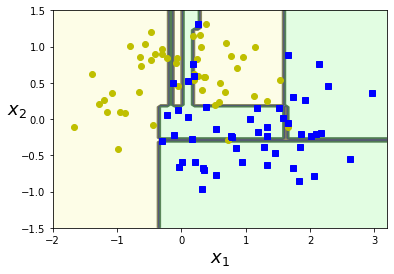

In [3]:

#Q1
from sklearn.datasets import make_moons
moons = make_moons(n_samples=100, noise=0.35, random_state=42)
X,y = moons

#Q2
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X,y)
plot_decision_boundary(clf, X, y, axes=[-2, 3.2, -1.5, 1.5], legend=False, plot_training=True)

#### Q. Comment on the overfitting nature of the Decision trees

The tree has overly fitted on the data as seen from the graph with decision boundaries. The boundaries are very precise to capture every point even the ones which are noisy or/and are outliers.

### B. Overfitting in decision tree classifiers

1. List and explain in a few lines, three of the regularization hyperparameters used while building a decision tree and why they might help reduce overfitting of a decision tree model.
2. Now fit a decision tree classifier on the same dataset using the min_samples_leaf hyperparameter set to $4$. Plot the decision boundaries and compare with the model fit without any hyperparameters. Which model do you think will generalize better to the test dataset? 
3. Fit and visualize a decision tree classifier after setting the maximum depth of nodes as $5$. Plot the decision boundaries by calling the helper function plot_decision_boundary provided to you. and compare with the model fit without any hyperparameters. Which model do you think will generalize better to the test dataset? 

##### B - Q1 Ans:
Three the regularization hyperparameters used while building a decision tree are:
1. Max depth: This is the maximum number of children nodes that can grow out from the decision tree until the tree is cut off.
2. Min samples leaf: This is the minimum number of samples, or data points, that are required to be present in the leaf node.
3. Min Samples Split: The minimum number of samples required to split an internal node.
These hyperparameters help by limiting the tree to fit each and every point and evolve too many splits. This results in reduced overfitting.

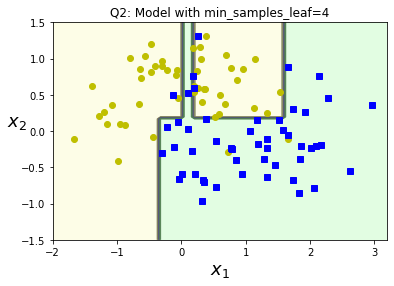

Model with regularization (min_samples_leaf=4) will generalize well as compared to no regularization


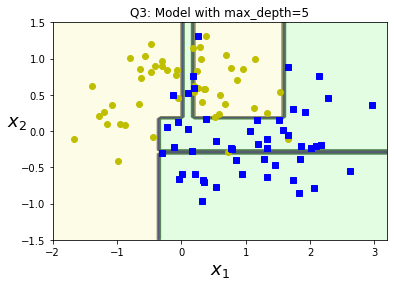

Model with regularization (max_depth=5) will generalize well as compared to no regularization


In [4]:
#Q2
clf = DecisionTreeClassifier(random_state=42,min_samples_leaf=4)
clf = clf.fit(X,y)
plot_decision_boundary(clf, X, y, axes=[-2, 3.2, -1.5, 1.5], legend=False, plot_training=True)
plt.title('Q2: Model with min_samples_leaf=4')
plt.show();
print('Model with regularization (min_samples_leaf=4) will generalize well as compared to no regularization')

#Q3
clf = DecisionTreeClassifier(random_state=42,max_depth=5)
clf = clf.fit(X,y)

plot_decision_boundary(clf, X, y, axes=[-2, 3.2, -1.5, 1.5], legend=False, plot_training=True)
plt.title('Q3: Model with max_depth=5')
plt.show();
print('Model with regularization (max_depth=5) will generalize well as compared to no regularization')

#### Q. Comment on the boundary surface of the decision tree. 
Hint: Observe the orthogonality of the boundary

##### Ans:
The decision boundaries are orthogonal and parallel to the axes because at each node the condition is on a single feature eg x>a or y<b etc. The decision boundaries are orthogonal to the features in a decision tree

### C. Linear classifiers vs decision tree classifiers

In [5]:
#Generate 100 points [x1, x2] in the 2D plane using np.random.rand() for -0.5<x1<0.5 and -0.5<x2<0.5
x = np.random.rand(100,2) - 0.5
y = np.zeros(100)
#Assign a label of 1 to all points having x1>0.0 and 0 otherwise
y[x[:,0]>0] = 1
#Rotate the dataset by 45 degrees in the [x1,x2] plane
rot = [[0.414,-0.414],[0.414,0.414]]
x_rot = np.matmul(rot,x.T)
x_rot = x_rot.T

1. Fit a linear Logistic Regression model and Decision Tree on the x_rot
2. Fit a linear Logistic Regression model and Decision tree on the make_moons dataset generated in A(1)


In [6]:
#Q1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Splitting x_rot into train and test sets
X_rot_train, X_rot_val, y_rot_train, y_rot_val = train_test_split(x_rot, y, test_size=0.2, random_state = 42)

#Fitting Logistic Reg
clf = LogisticRegression()
clf = clf.fit(X_rot_train,y_rot_train)
print('Logistic regression prediction score on training data (X_rot): %.3f'%clf.score(X_rot_train,y_rot_train))
print('Logistic regression prediction score on validation data (X_rot): %.3f\n'%clf.score(X_rot_val,y_rot_val))

#Fitting Logistic Reg
clf = DecisionTreeClassifier()
clf = clf.fit(X_rot_train,y_rot_train)
print('DecisionTree prediction score on training data (X_rot): %.3f'%clf.score(X_rot_train,y_rot_train))
print('DecisionTree prediction score on validation data (X_rot): %.3f\n'%clf.score(X_rot_val,y_rot_val))

Logistic regression prediction score on training data (X_rot): 0.988
Logistic regression prediction score on validation data (X_rot): 0.950

DecisionTree prediction score on training data (X_rot): 1.000
DecisionTree prediction score on validation data (X_rot): 0.800



In [7]:
#Q2
#Splitting x_rot into train and test sets
moons = make_moons(n_samples=100, noise=0.35, random_state=42)
X,y = moons
X_moons_train, X_moons_val, y_moons_train, y_moons_val = train_test_split(X, y, test_size=0.2, random_state = 42, shuffle=True)

#Fitting Logistic Reg
clf = LogisticRegression()
clf = clf.fit(X_moons_train,y_moons_train)
print('Logistic regression prediction score on training data (make_moons): %.3f'%clf.score(X_moons_train,y_moons_train))
print('Logistic regression prediction score on validation data (make_moons): %.3f\n'%clf.score(X_moons_val,y_moons_val))

#Fitting Logistic Reg
clf = DecisionTreeClassifier()
clf = clf.fit(X_moons_train,y_moons_train)
print('DecisionTree prediction score on training data (make_moons): %.3f'%clf.score(X_moons_train,y_moons_train))
print('DecisionTree prediction score on validation data (make_moons): %.3f\n'%clf.score(X_moons_val,y_moons_val))

Logistic regression prediction score on training data (make_moons): 0.812
Logistic regression prediction score on validation data (make_moons): 1.000

DecisionTree prediction score on training data (make_moons): 1.000
DecisionTree prediction score on validation data (make_moons): 0.700



#### Q. Compare the performance of Decision Trees and logistic regression on the two datasets

##### Ans:
Decision Trees fit well on training data (sometimes overfit) but do not generalize well as compared to logistic regression

### D. Regression using decision trees

1. Train a regression tree on the noisy sine dataset given below with three different max_depth values : $2, 3$ and $4$.
2. Plot the divisions of the input space and the predicted value in each division of the input space using the helper function plot_regression_predictions provided to you below for each regression tree model in (1).

In [8]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

#Sine + noise training set 
np.random.seed(10)
X = np.random.rand(150, 1)
y = np.sin(2*np.pi*X) + np.random.randn(150, 1) / 10

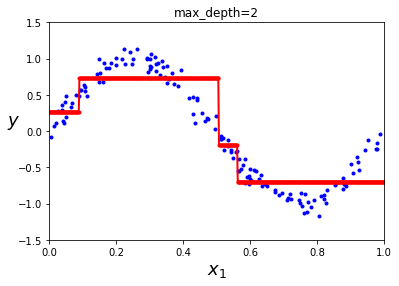

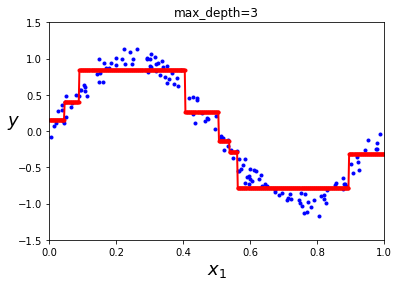

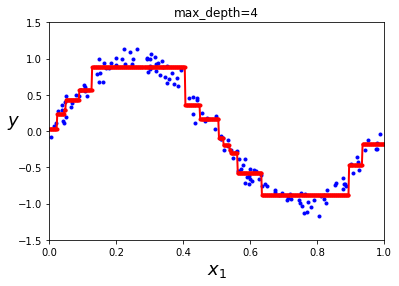

In [9]:
#Q1,2
from sklearn.tree import DecisionTreeRegressor

for mxdep in [2,3,4]:
    tree_reg = DecisionTreeRegressor(random_state=42,max_depth=mxdep)
    tree_reg = tree_reg.fit(X,y)
    plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -1.5, 1.5], ylabel="$y$")
    plt.title('max_depth=%d'%mxdep)
    plt.show();

### E. Overfitting in regression trees

1. Fit another regression tree on the dataset used above, with no restrictions on the regularization hyperparameters of the model. Plot the predicted value in all input space divisions.
2. What do you observe? Do regression trees too have a tendency to overfit if no regularization is applied? 

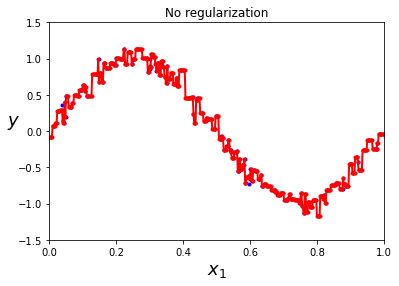

In [10]:
#Q1
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg = tree_reg.fit(X,y)
plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -1.5, 1.5], ylabel="$y$")
plt.title('No regularization')
plt.show();

###### Q2 Ans:
The Decision Tree regressor is heavily overfitted without applying any regularization, as observed from the graph.

### F. Fine-tuning a decision tree 

1. Generate a moons dataset using make_moons (n_samples=$10000$, noise=$0.5$). Random seed = 42 
2. Split it into a training set and a test set. 
3. Use grid search with cross-validation (with the help of GridSearchCV) to find good hyperparameter values for max_leaf_nodes and min_samples_split. Try values ranging from $2$ to $35$ for max_leaf_nodes and $2$ to $10$ for min_samples_split. Report the optimal hyperparameter values.
4. Train the decision tree classifier on the full training set using these optimal hyperparameters, and report your model's performance on the test set.

In [11]:
#Q1

moons = make_moons(n_samples=10000, noise=0.5, random_state=42)
X,y = moons

#Q2 Splitting data into training, validation and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42, shuffle=True)

In [12]:
#Q3, Q4
from sklearn.model_selection import GridSearchCV

parameters = {'max_leaf_nodes':range(2,36), 'min_samples_split':range(2,11)}
DTC = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(DTC, parameters)
clf = clf.fit(X_train,y_train)
print('Optimal max_leaf_nodes = %d\nOptimal min_samples_split = %d'%(clf.best_params_['max_leaf_nodes'],clf.best_params_['min_samples_split']))
print("Model's performance score on test set: %.3f" %clf.score(X_val,y_val))

Optimal max_leaf_nodes = 16
Optimal min_samples_split = 2
Model's performance score on test set: 0.831


### G. Training the Random Forest model
1. Load the loans dataset and use one-hot encoding for the column 'purpose'
2. Split the data into test and train sets with ratio 70:30 with random seed = 101
3. Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.
4. Predict the class of not.fully.paid for the X_test data
5. Now create a classification report from the results. Do you get anything strange or some sort of warning?

In [13]:
#Answer here
import pandas as pd
#Q1
loans = pd.read_csv('loan_data.csv')
One_Hot_Encoded_Data = pd.get_dummies(loans['purpose'], prefix='purpose')
loans = loans.drop(columns=['purpose'])
loans = pd.concat([loans,One_Hot_Encoded_Data],axis=1)


y = loans['not.fully.paid']
X = loans.loc[:, loans.columns != 'not.fully.paid']

#Q2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [14]:
#Q3,4
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf = clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

#Q5
print("=== Classification Report ===")
print(classification_report(y_test, y_test_pred))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874





F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
#Q5
print('There are some labels in y_test, which dont appear in y_test_pred and hence it is ill-defined.\nThat is the reason why we get a error/warning of UndefinedMetricWaring.')
print('\nThe label(s) missing in y_test_pred but present in Y_test are:', set(y_test) - set(y_test_pred))

There are some labels in y_test, which dont appear in y_test_pred and hence it is ill-defined.
That is the reason why we get a error/warning of UndefinedMetricWaring.

The label(s) missing in y_test_pred but present in Y_test are: {1}
